In [1]:
import pandas as pd
import numpy as np
from utilsPtBr import Utils
import re

dataPath = 'data/shortCorpus2.csv'
dataFullPath = 'data/halfCorpus.csv'
df_uf = pd.read_csv(dataPath, sep=';')
df_full = pd.read_csv(dataFullPath, sep=';')
util = Utils()

In [2]:
dictDataframeTreino = {
    "tag": [],
    "text": [],
}

dictDataframeTeste = {
    "tag": [],
    "text": [], 
}

dictDataframeWithoutAnothersTreino = {
    "tag": [],
    "text": [],
}

dictDataframeWithoutAnothersTeste = {
    "tag": [],
    "text": [], 
}

dictFullframeTeste = {
    "tag": [],
    "text": [], 
}
dictFullWithoutAnothersframeTeste = {
    "tag": [],
    "text": [], 
}
formatTag = {
    "Publicação - Despacho / Decisão": 1,
    "Publicação - Sentença": 2,
    "Publicação - Audiência": 3,
}


In [3]:
from random import randint
def calcTestLineAleatory():
    numberAleatory = randint(0,99);
    if numberAleatory % 9 == 1: 
        return True;
    return False;

In [4]:
# pre formatando texto e separando treino e teste
vocabulary = {
    'UNKNOWN': 'UNKNOWN'
}

for i in range (len(df_uf.index)):
    tag = df_uf.loc[i].iloc[1]
    tag = formatTag.get(tag, 0)
  
    text = df_uf.loc[i].iloc[2]
    tokens = util.tokenize(text)
    for tok in set(tokens):
        if bool(re.search(r'\d', tok)):
            vocabulary['NUMBER'] = tok
        else:  
            vocabulary[tok] = tok
    #freq = util.getPropoFreq(tokens)
  
    if calcTestLineAleatory():
        dictDataframeTeste['tag'].append(tag)
        dictDataframeTeste['text'].append(tokens)
    else:
        dictDataframeTreino['tag'].append(tag)
        dictDataframeTreino['text'].append(tokens)
    if tag != 0:
        if calcTestLineAleatory():
            dictDataframeWithoutAnothersTeste['tag'].append(tag)
            dictDataframeWithoutAnothersTeste['text'].append(tokens)
        else:
            dictDataframeWithoutAnothersTreino['tag'].append(tag)
            dictDataframeWithoutAnothersTreino['text'].append(tokens)     



In [5]:
vocabulary["UNKNOWN"] = "UNKNOWN"
print('size of vocanulary is ' + str(len(vocabulary.keys())) + ' words!')

word2index = {}
def get_word_2_index(vocab):
    for i,word in enumerate(vocab):
        if any(char.isdigit() for char in tok):
            word2index['NUMBER'] = i 
        else: 
            word2index[word] = i
    return word2index

word2index = get_word_2_index(vocabulary.keys())

print(word2index["UNKNOWN"])
def text_to_vector(tokens):
    totalUnknow = 0;
    layer = np.zeros(len(vocabulary.keys()),dtype=float)
    for word in tokens:
        index = word2index.get(word, word2index["UNKNOWN"])
        
        if any(char.isdigit() for char in word):
            index = word2index["NUMBER"]

        layer[index] += 1
        if index ==  word2index["UNKNOWN"]:
            totalUnknow += 1
#    if(totalUnknow> 0):        
#        print('total de palavras desconhecidas no vocabulario: ' + str(totalUnknow))
    return layer

size of vocanulary is 27817 words!
0


In [6]:
textsTreino = []
tagsTreino = []
textsTest = []
tagsTest = []
textsWOTreino = []
tagsWOTreino = []
textsWOTest = []
tagsWOTest = []

for i in range (len(dictDataframeTreino['text'])):
    textsTreino.append(text_to_vector(dictDataframeTreino['text'][i]))
    tagsTreino.append(dictDataframeTreino['tag'][i])

for i in range (len(dictDataframeTeste['text'])):
    textsTest.append(text_to_vector(dictDataframeTeste['text'][i]))
    tagsTest.append(dictDataframeTeste['tag'][i])

for i in range (len(dictDataframeWithoutAnothersTreino['text'])):
    textsWOTreino.append(text_to_vector(dictDataframeWithoutAnothersTreino['text'][i]))
    tagsWOTreino.append(dictDataframeWithoutAnothersTreino['tag'][i])

for i in range (len(dictDataframeWithoutAnothersTeste['text'])):
    textsWOTest.append(text_to_vector(dictDataframeWithoutAnothersTeste['text'][i]))
    tagsWOTest.append(dictDataframeWithoutAnothersTeste['tag'][i])


In [7]:
print('Total de amostras')
print('treino ' + str(len(tagsTreino)))
print('teste ' + str(len(tagsTest)))
print('treino sem outros ' + str(len(tagsWOTreino)))
print('teste sem outros ' + str(len(tagsWOTest)))


Total de amostras
treino 8884
teste 1060
treino sem outros 8009
teste sem outros 980


In [8]:

from sklearnClass import SKLRandomForestClassifier

RandomForestClassifier = SKLRandomForestClassifier()

score:      83.491%
              precision    recall  f1-score   support

           0       0.56      0.05      0.09        98
           1       0.83      0.94      0.88       575
           2       0.74      0.81      0.77       185
           3       0.97      0.95      0.96       202

    accuracy                           0.83      1060
   macro avg       0.77      0.69      0.68      1060
weighted avg       0.81      0.83      0.80      1060



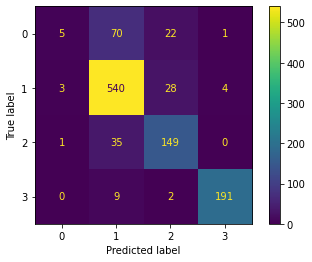

In [9]:
RandomForestClassifier.fit(textsTreino, tagsTreino)
RandomForestClassifier.test(textsTest, tagsTest)

In [ ]:
RandomForestClassifier.getConfusionMatrix(textsTest, tagsTest)

score:      93.776%
              precision    recall  f1-score   support

           1       0.94      0.96      0.95       574
           2       0.90      0.83      0.86       185
           3       0.97      0.97      0.97       221

    accuracy                           0.94       980
   macro avg       0.94      0.92      0.93       980
weighted avg       0.94      0.94      0.94       980



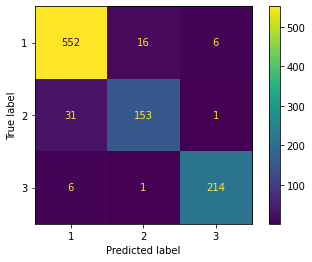

In [10]:
RandomForestClassifier.fit(textsWOTreino, tagsWOTreino)
RandomForestClassifier.test(textsWOTest, tagsWOTest)

In [ ]:
RandomForestClassifier.getConfusionMatrix(textsWOTest, tagsWOTest)